# Data Exploration - MURA-Finance Project
**Phase 1, Task 1: Data Exploration**

This notebook performs comprehensive data exploration on all CSV files.

## Objectives
1. Load and inspect all CSV files
2. Understand data schema and column meanings
3. Check data quality (missing values, duplicates)
4. Analyze data distributions (sentiment, ticker, temporal)
5. Map relationship between ground truth and predictions
6. Identify data inconsistencies or anomalies

## 1. Setup and Imports

In [26]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Add src to path
sys.path.insert(0, str(Path().resolve().parent))

from src.utils.data_loader import (
    load_all_dataframes,
    get_schema_info,
    print_dataframe_summary
)
from src.utils.analysis import (
    analyze_sentiment_distribution,
    map_ground_truth_to_predictions,
)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Setup complete!")

Setup complete!


## 2. Load Data

In [27]:
# Set base path
base_path = Path().resolve().parent

# Load all dataframes
print("Loading dataframes...")
data = load_all_dataframes(base_path)

print(f"\nLoaded {len(data)} data files\n")

# Display what we loaded
for name, df in data.items():
    print(f"{name}: {len(df)} rows × {len(df.columns)} columns")

Loading dataframes...
Loaded ground truth: 2291 rows
Loaded single article predictions: 2291 rows
Loaded all-day articles: 293 rows

Loaded 3 data files

ground_truth: 2291 rows × 10 columns
single_article: 2291 rows × 49 columns
allday_articles: 293 rows × 19 columns


## 3. Ground Truth Data Analysis

In [28]:
if 'ground_truth' in data:
    df_gt = data['ground_truth']

    print_dataframe_summary(df_gt, "Ground Truth")

    # Display schema
    schema_info = get_schema_info(df_gt, "Ground Truth")
    display(schema_info)

    # Show first few rows
    display(df_gt.head(3))


SUMMARY: Ground Truth
Shape: 2291 rows × 10 columns
Memory usage: 7.82 MB

Column Information:
            Column Data Type  Non-Null Count  Null Count  Null Percentage  Unique Values
      published_at       str            2291           0              0.0           2259
            ticker       str            2291           0              0.0              5
    true_sentiment       str            2291           0              0.0              3
             title       str            2291           0              0.0           2265
            author       str            2291           0              0.0             18
               url       str            2291           0              0.0           2291
            source       str            2291           0              0.0              2
              text       str            2291           0              0.0           2291
 finbert_sentiment       str            2291           0              0.0              3
finbert_sent_s

,Column,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Values
published_at,published_at,str,2291,0,0.0,2259
ticker,ticker,str,2291,0,0.0,5
true_sentiment,true_sentiment,str,2291,0,0.0,3
title,title,str,2291,0,0.0,2265
author,author,str,2291,0,0.0,18
url,url,str,2291,0,0.0,2291
source,source,str,2291,0,0.0,2
text,text,str,2291,0,0.0,2291
finbert_sentiment,finbert_sentiment,str,2291,0,0.0,3
finbert_sent_score,finbert_sent_score,float64,2291,0,0.0,192


,published_at,ticker,true_sentiment,title,author,url,source,text,finbert_sentiment,finbert_sent_score
0,2023-01-12 07:47:00,EURCHF,Positive,Euro to benefit from the ECBs pronounced hawkish determination – Commerzbank,FXStreet Insights Team,https://www.fxstreet.com/news/euro-to-benefit-from-the-ecbs-pronounced-hawkish-determination-com...,FX Street,"The Euro was able to appreciate particularly significantly against the Swiss Franc yesterday, bu...",Positive,0.85
1,2023-01-12 10:34:00,EURCHF,Positive,EURCHF Trend higher may remain in place – ING,FXStreet Insights Team,https://www.fxstreet.com/news/eur-chf-trend-higher-may-remain-in-place-ing-202301121034,FX Street,EUR/CHF yesterday broke above 1.00. Economists at ING had been forecasting a lower EUR/CHF this ...,Positive,0.51
2,2023-01-12 11:40:00,EURCHF,Neutral,Does a jump in EURCHF point to a break above 108 in EURUSD – SocGen,FXStreet Insights Team,https://www.fxstreet.com/news/does-a-jump-in-eur-chf-point-to-a-break-above-108-in-eur-usd-socge...,FX Street,EUR/CHF vaults parity for the first time since July. Does EUR/CHF point to a break higher in EUR...,Neutral,0.37


Sentiment Distribution:
  Neutral: 815 (35.57%)
  Positive: 767 (33.48%)
  Negative: 709 (30.95%)


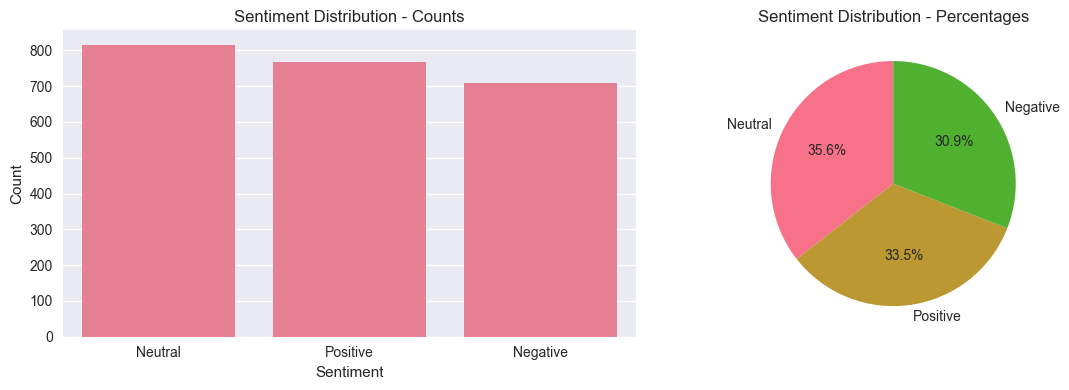

In [29]:
# Sentiment distribution with visualization
if 'ground_truth' in data and 'true_sentiment' in data['ground_truth'].columns:
    df_gt = data['ground_truth']

    sentiment_dist = analyze_sentiment_distribution(df_gt, 'true_sentiment')

    print("Sentiment Distribution:")
    for sentiment, count in sentiment_dist['counts'].items():
        pct = sentiment_dist['percentages'].get(sentiment, 0)
        print(f"  {sentiment}: {count} ({pct}%)")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Bar chart
    sentiment_df = pd.DataFrame({
        'Sentiment': list(sentiment_dist['counts'].keys()),
        'Count': list(sentiment_dist['counts'].values())
    })
    sns.barplot(data=sentiment_df, x='Sentiment', y='Count', ax=ax1)
    ax1.set_title('Sentiment Distribution - Counts')
    ax1.set_ylabel('Count')

    # Pie chart
    ax2.pie(sentiment_dist['counts'].values(),
            labels=sentiment_dist['counts'].keys(),
            autopct='%1.1f%%',
            startangle=90)
    ax2.set_title('Sentiment Distribution - Percentages')

    plt.tight_layout()
    plt.show()

## 4. Single Article Predictions Analysis

In [30]:
if 'single_article' in data:
    df_single = data['single_article']

    print(f"Shape: {df_single.shape[0]} rows × {df_single.shape[1]} columns")

    # Analyze sentiment columns
    sentiment_cols = [col for col in df_single.columns if 'sentiment' in col.lower()]
    print(f"\nFound {len(sentiment_cols)} sentiment columns:")
    for col in sentiment_cols:
        print(f"  - {col}")

    # Show schema for first 20 columns
    schema_info = get_schema_info(df_single, "Single Article")
    display(schema_info.head(20))

Shape: 2291 rows × 49 columns

Found 15 sentiment columns:
  - true_sentiment
  - finbert_sentiment
  - finbert_sentiment_a
  - gpt_sentiment_p1
  - gpt_sentiment_p2
  - gpt_sentiment_p3
  - gpt_sentiment_p4
  - gpt_sentiment_p7
  - finbert_sentiment_n
  - finbert_sentiment_a_n
  - gpt_sentiment_p1n
  - gpt_sentiment_p2n
  - gpt_sentiment_p3n
  - gpt_sentiment_p4n
  - gpt_sentiment_p7n


,Column,Data Type,Non-Null Count,Null Count,Null Percentage,Unique Values
published_at,published_at,str,2291,0,0.0,2259
ticker,ticker,str,2291,0,0.0,5
title,title,str,2291,0,0.0,2265
text,text,str,2291,0,0.0,2291
true_sentiment,true_sentiment,int64,2291,0,0.0,3
finbert_sentiment,finbert_sentiment,int64,2291,0,0.0,3
finbert_sentiment_a,finbert_sentiment_a,int64,2291,0,0.0,3
gpt_sentiment_p1,gpt_sentiment_p1,int64,2291,0,0.0,3
gpt_completion_tokens_p1,gpt_completion_tokens_p1,float64,2291,0,0.0,1
gpt_prompt_tokens_p1,gpt_prompt_tokens_p1,float64,2291,0,0.0,27


## 5. Ground Truth vs Predictions Mapping

In [31]:
if 'ground_truth' in data and 'single_article' in data:
    merged, mapping_stats = map_ground_truth_to_predictions(
        data['ground_truth'],
        data['single_article']
    )

    print("Mapping Statistics:")
    print(f"  Ground truth records: {mapping_stats['total_ground_truth']}")
    print(f"  Prediction records: {mapping_stats['total_predictions']}")
    print(f"  Matched records: {mapping_stats['matched_records']}")
    print(f"  Match rate: {mapping_stats['match_rate']}%")

    if mapping_stats['matched_records'] > 0:
        print("\n✓ Ground truth and predictions can be matched!")

Mapping Statistics:
  Ground truth records: 2291
  Prediction records: 2291
  Matched records: 2291
  Match rate: 100.0%

✓ Ground truth and predictions can be matched!


## 6. Data Inconsistencies & Anomalies

In [32]:
# Check sentiment encoding mismatch
if 'ground_truth' in data and 'single_article' in data:
    df_gt = data['ground_truth']
    df_single = data['single_article']

    if 'true_sentiment' in df_gt.columns and 'true_sentiment' in df_single.columns:
        gt_unique = set(df_gt['true_sentiment'].unique())
        single_unique = set(df_single['true_sentiment'].unique())

        print("⚠ Sentiment Encoding Mismatch:")
        print(f"  Ground Truth: {gt_unique}")
        print(f"  Predictions: {single_unique}")
        print(f"\n  Mapping needed:")
        print(f"    Positive ↔ 1")
        print(f"    Neutral ↔ 0")
        print(f"    Negative ↔ -1")

⚠ Sentiment Encoding Mismatch:
  Ground Truth: {'Positive', 'Neutral', 'Negative'}
  Predictions: {np.int64(0), np.int64(1), np.int64(-1)}

  Mapping needed:
    Positive ↔ 1
    Neutral ↔ 0
    Negative ↔ -1
